In [1]:
import numpy as np
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dt = pd.read_csv('SF_good.csv')

In [2]:
from scipy.spatial.distance import *
import matplotlib.pyplot as plt

from scipy.stats import wasserstein_distance as WD
def METRIC(inA,inB,metric=WD,gran=12):
    DEV=[]
    

    for i in range(gran,len(inA)):
        A = inA[i-gran:i]
        B = inB[i-gran:i]
#         print(A.shape,B.shape)
        res = metric(A,B)
        
        # Assumption #1: accident represents a drop in traffic speed
        if np.sum(A)<np.sum(B):
            DEV.append(res)
        else:
            DEV.append(0)

    lst=DEV[-1]
    for i in range(gran):
        DEV.append(lst)
        
    DEV = np.array(DEV)
    return DEV

def qfilter(V,quantile=0.96):
    Q = np.quantile(V,quantile)
    ARR=[]
    for i in range(len(V)):
        if V[i]>=Q:
            ARR.append(1)
        else:
            ARR.append(0)
    return np.array(ARR)
# from sklearn.preprocessing import normalize
# def norm(A):
#     return normalize(A.reshape(-1,1)).ravel()

In [3]:
from datetime import datetime, timedelta

def minutes_since_midnight(date_time_str):
    date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')

    midnight_obj = date_time_obj.replace(hour=0, minute=0, second=0, microsecond=0)
    minutes_since_midnight = (date_time_obj - midnight_obj) // timedelta(minutes=1)

    return minutes_since_midnight



# print(start,end, (end-start)*5)

In [4]:
from sklearn.preprocessing import MinMaxScaler

def standard_scale(input_vector):
    """
    This function performs standard scaling between 0 and 1 of an input vector.
    
    Args:
    input_vector (list or numpy array): The input vector to be scaled.
    
    Returns:
    numpy array: The scaled input vector.
    """
    
    # Create a MinMaxScaler object
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Reshape the input vector to a 2D array with one column
    input_vector_reshaped = [[x] for x in input_vector]

    # Use the scaler to perform the standard scaling
    scaled_input_vector = scaler.fit_transform(input_vector_reshaped)

    # Return the scaled input vector
    return scaled_input_vector.flatten()

In [5]:
import warnings

results = {}
from tqdm import tqdm

for i in tqdm(range(len(dt))):
    
    row = dt.iloc[i]
    ID = row.ID
    
    
    try:
        total = pd.read_csv('TOTAL/'+ID+'.csv')['Speed (mph)']




        day = total[-288:].values
        twoweeks = total[:-288].values #np.array(np.split(total.values,15))[:14]
#         print(len(twoweeks))
        profile = np.mean(np.array(np.split(total.values,15))[:14],axis=0)
    #     print(day.shape,profile.shape)

        start = minutes_since_midnight(row.Start_Time)
        end = minutes_since_midnight(row.End_Time)
        duration = (end-start)

#         plt.axvline(x=start//5,c='r',lw=3,ls='--',label='disruption start')
#         plt.axvline(x=end//5,c='b',lw=3,ls='--',label='disruption end')

#         plt.plot(day)
#         plt.plot(profile)

        M = METRIC(day,profile,chebyshev)
    
        with warnings.catch_warnings():
            
            warnings.filterwarnings('error', category=RuntimeWarning)
            M = (M*M)/(M*M).max()
            chebSQ = np.convolve(qfilter(M,0.7),[0.25,0.25,0.25,0.25])

#         plt.plot((day.max())* standard_scale(chebSQ))
#         plt.plot((day.max())* standard_scale(M))
#         plt.grid()

            WD = METRIC(day,profile)

            results[ID] = {
                'ID':ID,
                'day': day,
                'twoweeks': twoweeks,
                'profile': profile,
                'cheb': M,
                'chebSQ': chebSQ,
                'WD' : WD,
                'start1': start,
                'end1': end,
                'duration1': duration,
                'start5': start//5,
                'end5': end//5,
                'duration5': duration//5,
                'startM':-1,
                'endM':-1,
                'startW':-1,
                'endW':-1,
            }
    except:
        print('catched')
    
#     break

  4%|▍         | 76/1862 [00:01<00:47, 37.70it/s]

catched


  8%|▊         | 144/1862 [00:03<00:41, 40.95it/s]

catched


 35%|███▍      | 643/1862 [00:16<00:30, 40.61it/s]

catched


 35%|███▌      | 653/1862 [00:16<00:29, 40.49it/s]

catched


 48%|████▊     | 892/1862 [00:22<00:23, 41.86it/s]

catched


100%|██████████| 1862/1862 [00:44<00:00, 42.14it/s]

catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched
catched


In [6]:
results['A-1223']

{'ID': 'A-1223',
 'day': array([68.1, 68.3, 68.4, 68.4, 68.4, 68.3, 67.6, 68.5, 67.8, 67.5, 67.5,
        67.8, 68.4, 67.5, 67.6, 66.8, 67.9, 67.6, 67.1, 66.6, 68.2, 66.8,
        66.4, 66.7, 67.1, 67.3, 67.2, 67.5, 67.1, 67.4, 66.1, 67.9, 67.3,
        68.5, 66.5, 66.8, 67.3, 67.6, 68. , 67.8, 66.9, 66. , 66. , 66.9,
        66.7, 67.3, 67.2, 67.4, 66.2, 67.9, 67.6, 67.8, 66.8, 66.6, 68.5,
        66.6, 67. , 66.9, 66.5, 66.7, 67.8, 66.6, 66.7, 66.3, 66.5, 66.9,
        66.5, 67.8, 67.4, 67. , 67.7, 65.6, 67.7, 66.8, 66.9, 66.2, 67.4,
        67.4, 66.6, 67.5, 66.5, 66.4, 67.8, 67.6, 67.5, 67.9, 68. , 68.4,
        67.9, 68.4, 68. , 68.2, 68.2, 67.6, 67.8, 67.9, 67.7, 67.8, 67.9,
        67. , 67.3, 67.4, 67.5, 68.1, 67.5, 68.2, 68.4, 67.7, 67.4, 66.8,
        68.1, 66.5, 67. , 67.5, 67.3, 67.3, 67.9, 68.1, 67.9, 67.9, 66.9,
        67.1, 65.2, 66.6, 67.4, 67.7, 67.9, 67.5, 68.4, 65.7, 66.6, 67.4,
        67.8, 67.5, 67.6, 66.7, 67.5, 65.9, 67. , 67.1, 66.7, 68.1, 67.9,
        67.4, 

In [7]:
import pickle

# your code that populates the results dictionary

# dump the results dictionary into a file using pickle
with open('speed.pkl', 'wb') as f:
    pickle.dump(results, f)

In [12]:
results[0]

KeyError: 0

In [ ]:
#Just speeds
for K,V in results.items():
    data = results[K]
    print(data.keys())
    plt.figure(figsize=(6,3.5))
    plt.axvline(x=data['start5'],c='r',lw=3,ls='--',label='Disruption Start (report)')
    plt.axvline(x=data['end5'],c='b',lw=3,ls='--',label='Disruption End (report)')

    plt.plot(data['day'],label='Traffic Speed (Day)')
    plt.plot(data['profile'],label='Traffic Speed (Profile)')
#     plt.plot((data['day'].max()/2)* standard_scale(data['chebSQ']),label='Segmentation',ls='--',lw=2)
#     plt.plot((data['day'].max()/2)* standard_scale(data['cheb']),label='Chebyshev',ls='--')
#     plt.plot((data['day'].max()/2)* standard_scale(data['WD']),label='WD',ls='--')
    plt.xlim(0,288)
    plt.grid()
    plt.title('Accident ' +str(data['ID']))
    plt.legend()
    plt.xticks(np.arange(0,288,12),np.arange(0,288,12)*5//60)
    plt.xlabel('Hour')

    plt.ylabel('Speed [km/h]')
    plt.tight_layout(pad=0)
    plt.savefig(K+'.pdf')
    plt.show()
    

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


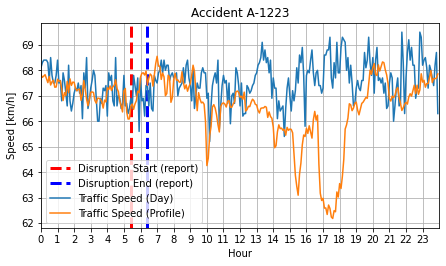

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


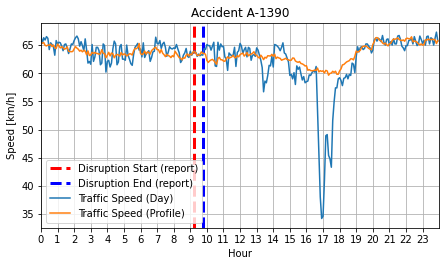

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


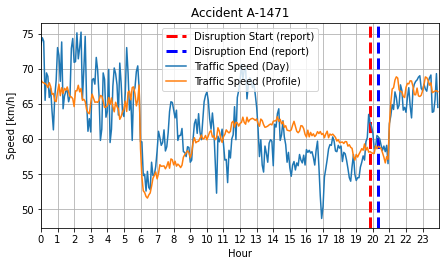

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


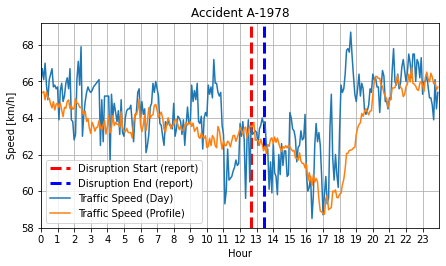

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


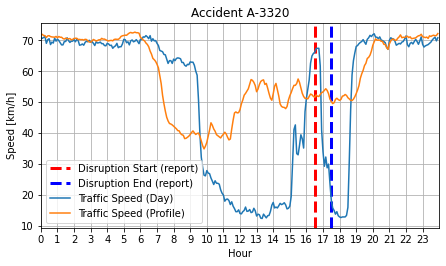

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


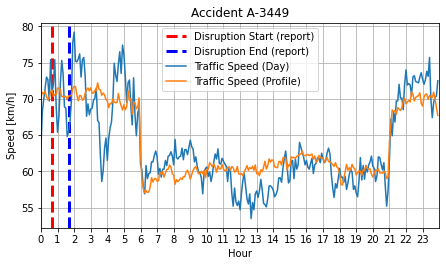

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


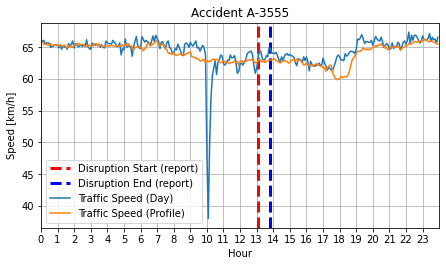

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


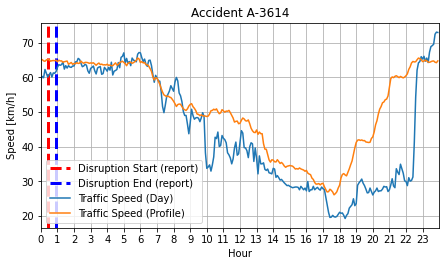

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


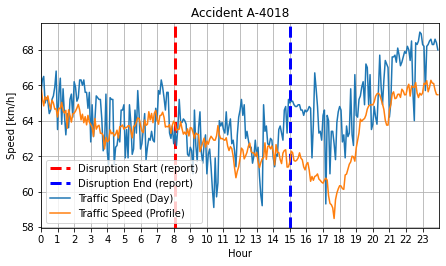

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


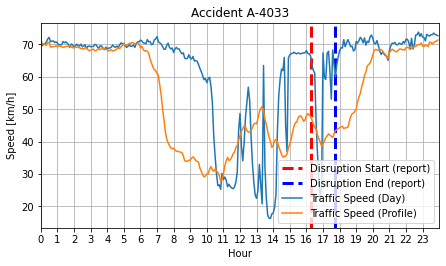

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


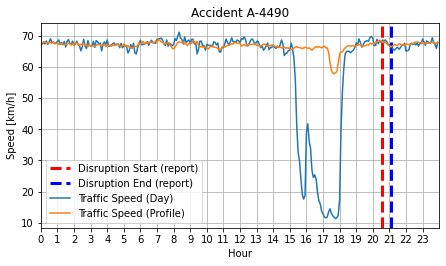

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


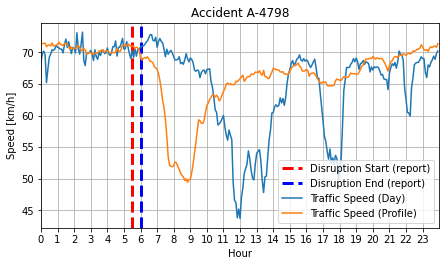

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


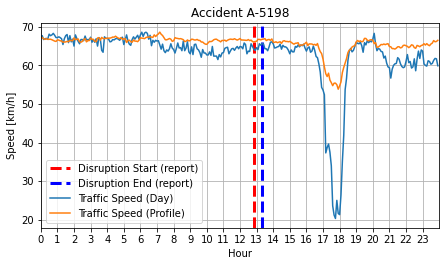

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


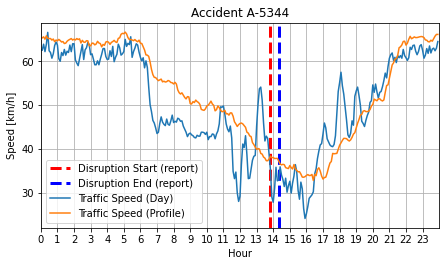

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


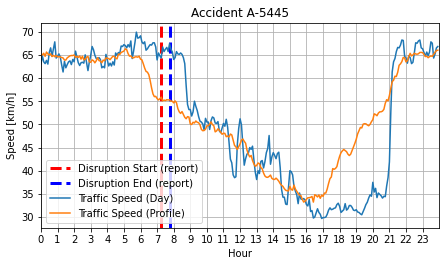

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


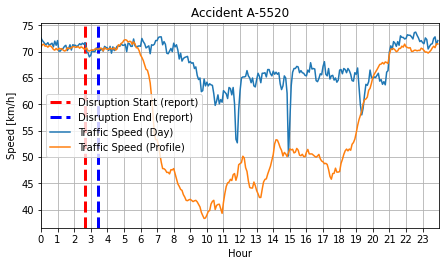

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


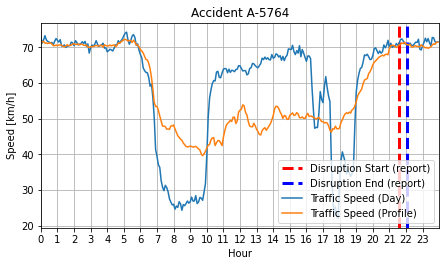

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


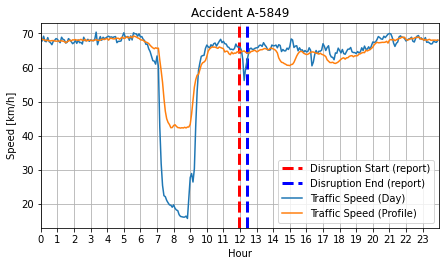

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


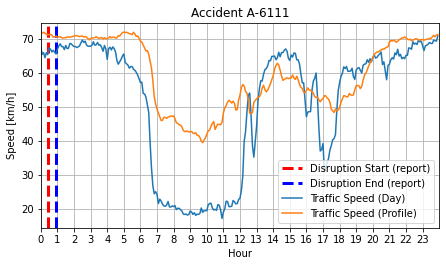

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


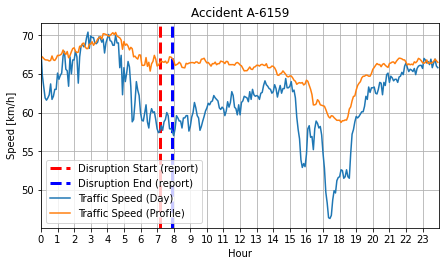

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


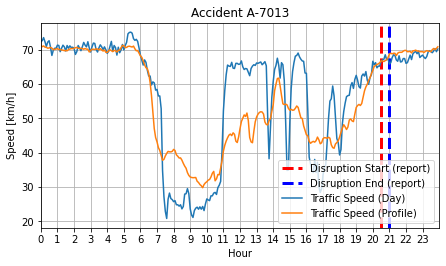

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


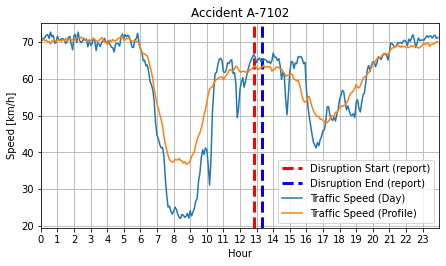

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


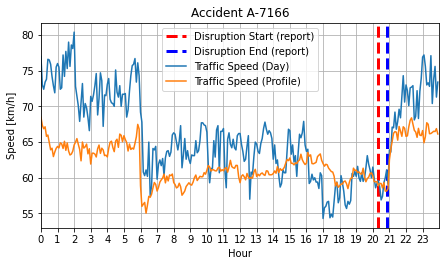

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


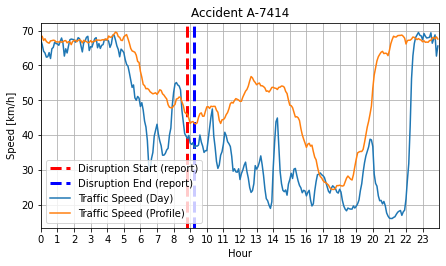

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


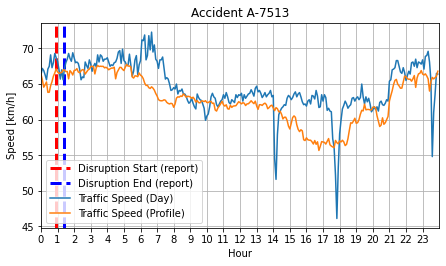

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


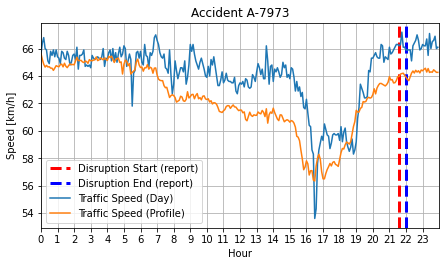

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


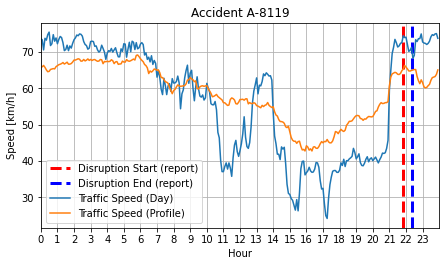

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


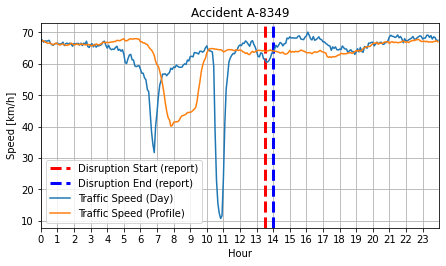

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


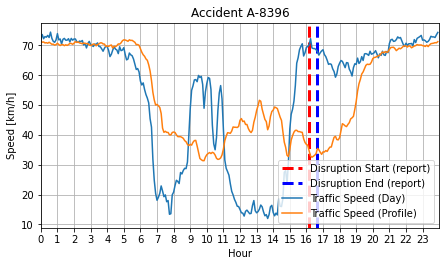

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


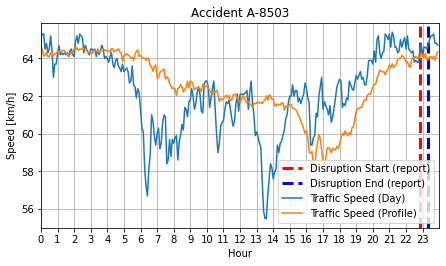

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


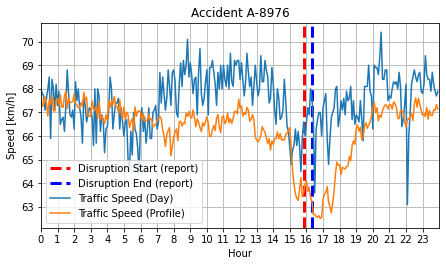

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


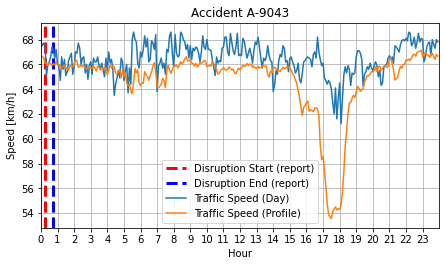

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


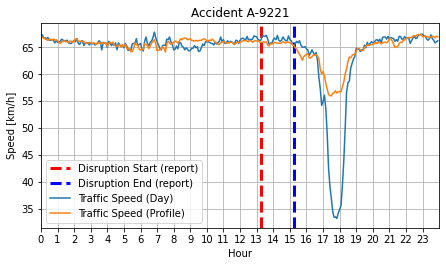

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


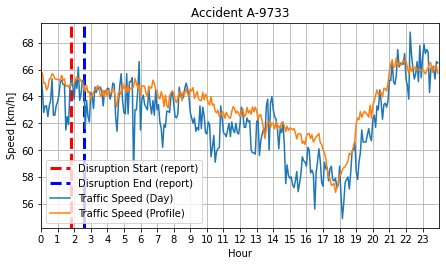

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


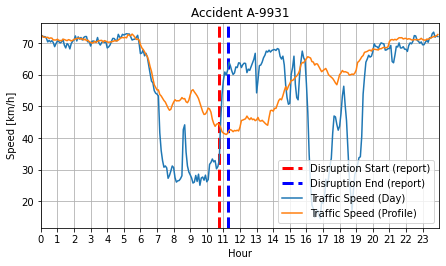

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


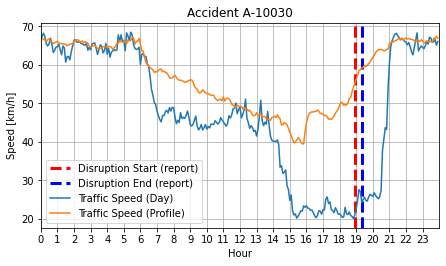

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


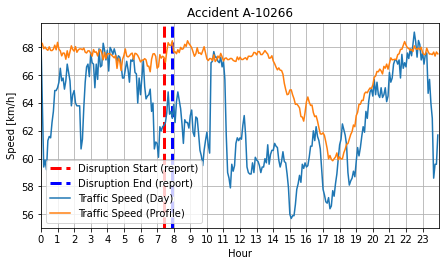

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


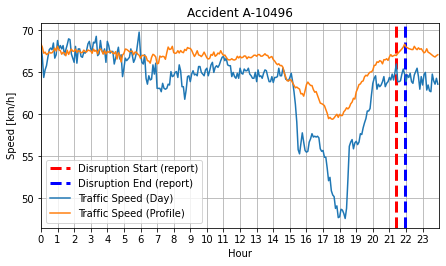

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


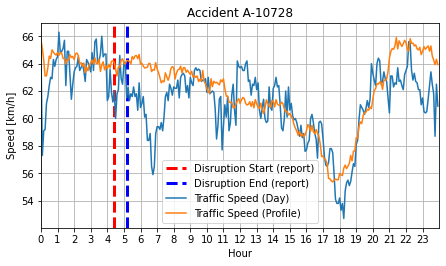

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


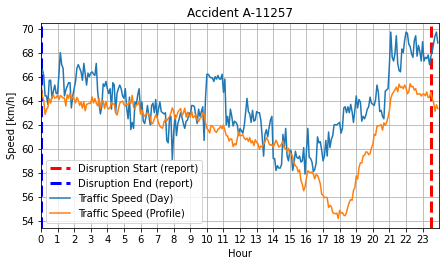

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


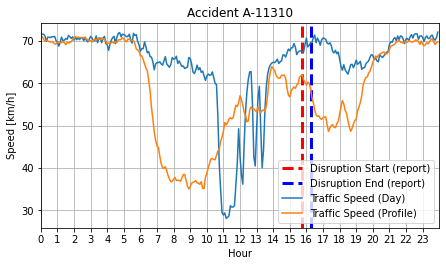

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


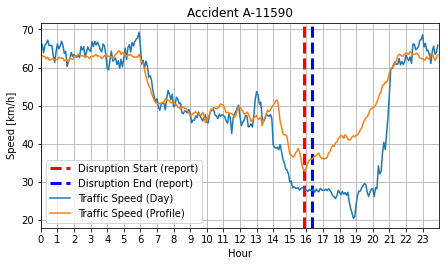

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


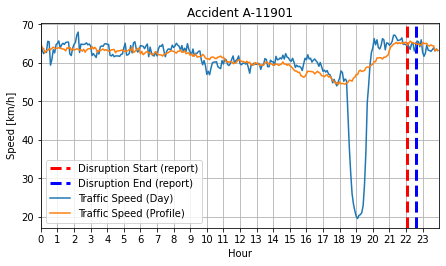

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


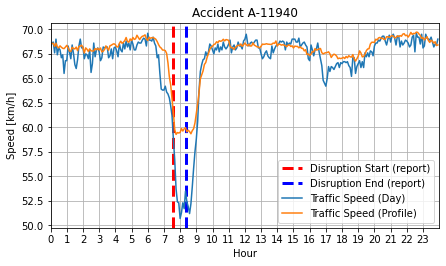

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


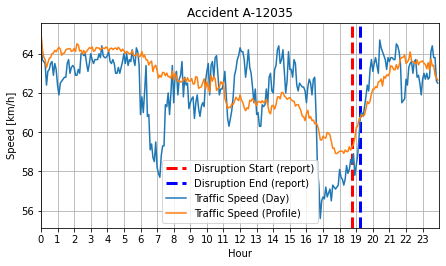

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


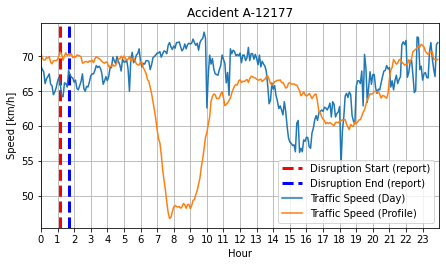

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


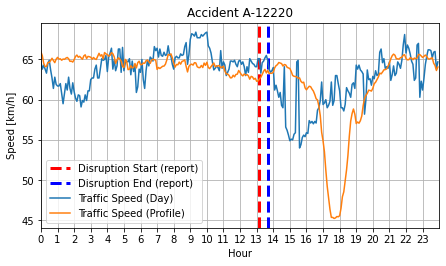

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


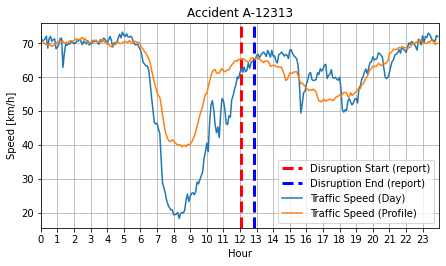

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


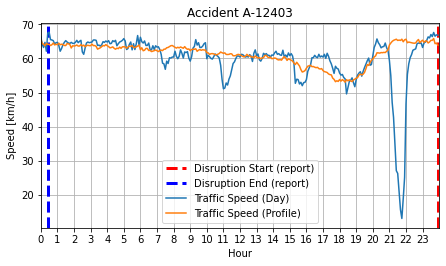

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])


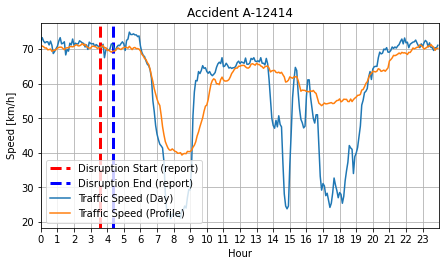

dict_keys(['ID', 'day', 'twoweeks', 'profile', 'cheb', 'chebSQ', 'WD', 'start1', 'end1', 'duration1', 'start5', 'end5', 'duration5', 'startM', 'endM', 'startW', 'endW'])



KeyboardInterrupt



In [14]:
for K,V in results.items():
    data = results[K]
    print(data.keys())
    plt.figure(figsize=(11,3))
    plt.axvline(x=data['start5'],c='r',lw=3,ls='--',label='Disruption Start (report)')
    plt.axvline(x=data['end5'],c='b',lw=3,ls='--',label='Disruption End (report)')

    plt.plot(data['day'],label='Traffic Speed (Day)')
    plt.plot(data['profile'],label='Traffic Speed (Profile)')
    plt.plot((data['day'].max()/2)* standard_scale(data['chebSQ']),label='Segmentation',ls='--',lw=2)
    plt.plot((data['day'].max()/2)* standard_scale(data['cheb']),label='Chebyshev',ls='--')
    plt.plot((data['day'].max()/2)* standard_scale(data['WD']),label='WD',ls='--')
    plt.xlim(0,288)
    plt.grid()
    plt.legend()
    plt.title('Accident ' +str(data['ID']))
    plt.xticks(np.arange(0,288,12),np.arange(0,288,12)*5//60)
    plt.xlabel('Hours')
    plt.ylabel('(Speed [km/h]) or (Scaled Norm Cheb/WD / 2)')
    plt.tight_layout(pad=0)
    plt.savefig(K+'.pdf')
    plt.show()
    

0       60
1       30
2       30
3       45
4       60
        ..
1857    29
1858    28
1859    29
1860    28
1861    28
Name: Duration, Length: 1862, dtype: int64

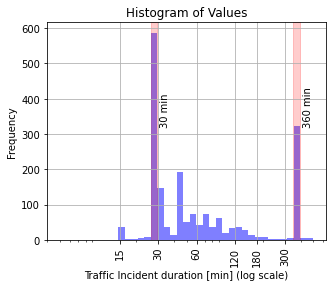

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data between 5 and 500
data = dt.Duration #np.random.uniform(low=5, high=500, size=10000)

# Create histogram with log scale on x-axis
plt.figure(figsize=(5,4))

bins = np.logspace(np.log10(5), np.log10(500), 40)
plt.hist(data, bins=bins, alpha=0.5, color='b')
plt.grid()
# Highlight bins for values 30 and 360
plt.axvspan(26, 29, alpha=0.2, color='r')
plt.axvspan(345, 390, alpha=0.2, color='r')

# Highlight bins for values 30 and 360 with text above them
# plt.axvspan(30, 32, alpha=0.5, color='b')
plt.text(34, 320, '30 min', rotation=90, va='bottom', ha='center')
# plt.axvspan(360, 365, alpha=0.5, color='r')
plt.text(450, 320, '360 min', rotation=90, va='bottom', ha='center')


# Set xticks for values 30, 150, and 300



# Set x-axis label to log scale
plt.xscale('log')

plt.xlabel('Traffic Incident duration [min] (log scale)')
plt.ylabel('Frequency')
plt.title('Histogram of Values')

xticks = [15, 30, 60, 120, 180, 300]
xticklabels = ['15','30', '60', '120', '180', '300']
plt.xticks(xticks, xticklabels, rotation=90)

# plt.show()
plt.savefig('hist2.pdf')

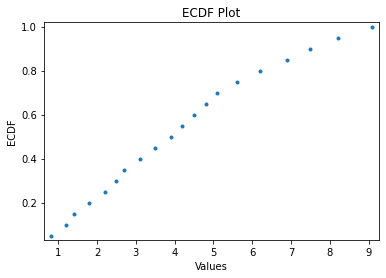

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Define a list of values
values = [0.8, 1.2, 1.4, 1.8, 2.2, 2.5, 2.7, 3.1, 3.5, 3.9, 4.2, 4.5, 4.8, 5.1, 5.6, 6.2, 6.9, 7.5, 8.2, 9.1]

# Compute the ECDF
x = np.sort(values)
y = np.arange(1, len(x)+1) / len(x)

# Plot the ECDF
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Values')
plt.ylabel('ECDF')
plt.title('ECDF Plot')
plt.margins(0.02)  # Add some margins to the plot
plt.show()

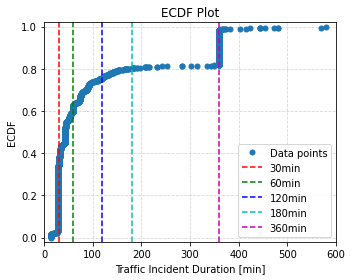

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Define a list of values
values = dt.Duration#[0.8, 1.2, 1.4, 1.8, 2.2, 2.5, 2.7, 3.1, 3.5, 3.9, 4.2, 4.5, 4.8, 5.1, 5.6, 6.2, 6.9, 7.5, 8.2, 9.1]

# Compute the ECDF
x = np.sort(values)
y = np.arange(1, len(x)+1) / len(x)

# Plot the ECDF
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(x, y, marker='.', markersize=10, linestyle='none', label='Data points')
ax.set_xlabel('Traffic Incident Duration [min]')
ax.set_ylabel('ECDF')
ax.set_title('ECDF Plot')
ax.grid(True, linestyle='--', alpha=0.5)

import matplotlib.colors as mcolors
# Define the values to highlight with vertical lines
highlight_values = [30, 60, 120, 180, 360]

key_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Plot vertical lines at the selected values
for i in range(len(highlight_values)):
    value = highlight_values[i]
    index = np.argmin(np.abs(x-value))
    color = key_colors[i % len(key_colors)]
    ax.axvline(x[index], color = color,linestyle='--', label=str(value)+'min')

ax.legend(loc='lower right')
ax.set_xlim(0,600)
plt.margins(0.02)  # Add some margins to the plot
plt.tight_layout()

plt.savefig('ECDF.pdf')


In [116]:
import PyPDF2

# Define the input file names and scaling factors
file_names = ['A-1223.pdf', 'A-1390.pdf', 'A-1390.pdf', 'A-1390.pdf']
scales = [0.8, 0.8, 0.7, 0.7]

# Create a new PDF file with a 2 x 2 grid layout
output_file = PyPDF2.PdfWriter()
page_width, page_height = PyPDF2.PageObject().mediabox.upperRight

for i in range(0, len(file_names), 4):
    # Create a new page for the grid
    grid_page = PyPDF2.pdf.PageObject.createBlankPage(None, page_width*2, page_height*2)
    
    # Insert the PDF pages in the grid
    for j in range(4):
        if i+j < len(file_names):
            file_name = file_names[i+j]
            input_file = PyPDF2.PdfFileReader(open(file_name, 'rb'))
            page = input_file.getPage(0)
            scale = scales[i+j]
            page.scaleBy(scale)
            x = j % 2 * page_width + (page_width - page.mediaBox.getWidth() * scale) / 2
            y = (1 - j // 2) * page_height + (page_height - page.mediaBox.getHeight() * scale) / 2
            grid_page.mergeTranslatedPage(page, x, y, expand=True)
    
    # Add the grid page to the output file
    output_file.addPage(grid_page)

# Write the output file
with open('output.pdf', 'wb') as f:
    output_file.write(f)


TypeError: object of type 'NoneType' has no len()

C:\Users\A\AppData\Local\Temp\ipykernel_18364\446637138.py:15: RuntimeWarning: divide by zero encountered in divide
  derivative = dy / dx


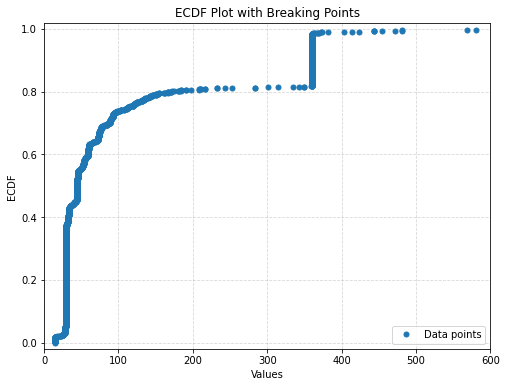

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Define a list of values
values = dt.Duration#[0.8, 1.2, 1.4, 1.8, 2.2, 2.5, 2.7, 3.1, 3.5, 3.9, 4.2, 4.5, 4.8, 5.1, 5.6, 6.2, 6.9, 7.5, 8.2, 9.1]

# Compute the ECDF
x = np.sort(values)
y = np.arange(1, len(x)+1) / len(x)

# Compute the derivative of the ECDF
dx = np.diff(x)
dy = np.diff(y)
derivative = dy / dx

# Find the local maxima of the derivative
peaks, _ = find_peaks(derivative, height=0)
peaks = peaks[np.argsort(derivative[peaks])[::-1]][:20]

# print(peaks)

# Plot the ECDF with vertical lines at the breaking points
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, marker='.', markersize=10, linestyle='none', label='Data points')

# ax.vlines(x[peaks], ymin=y[peaks], ymax=y[peaks]+0.05, color='r', label='Breaking points')
ax.set_xlabel('Values')
ax.set_ylabel('ECDF')
ax.set_title('ECDF Plot with Breaking Points')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(loc='lower right')
ax.set_xlim(0,600)
plt.margins(0.02)  # Add some margins to the plot
plt.show()


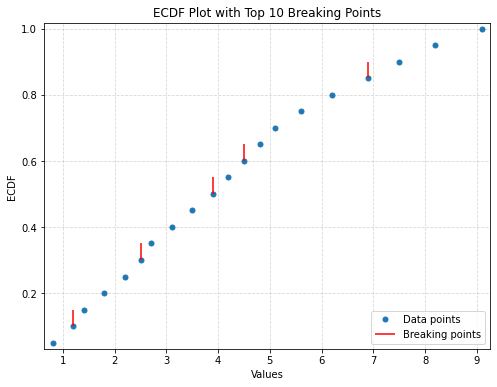

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Define a list of values
values = [0.8, 1.2, 1.4, 1.8, 2.2, 2.5, 2.7, 3.1, 3.5, 3.9, 4.2, 4.5, 4.8, 5.1, 5.6, 6.2, 6.9, 7.5, 8.2, 9.1]

# Compute the ECDF
x = np.sort(values)
y = np.arange(1, len(x)+1) / len(x)

# Compute the derivative of the ECDF
dx = np.diff(x)
dy = np.diff(y)
derivative = dy / dx

# Find the local maxima of the derivative and select the top 10 peaks
peaks, _ = find_peaks(derivative, height=0)
peaks = peaks[np.argsort(derivative[peaks])[::-1]][:10]

# Plot the ECDF with vertical lines at the selected peaks
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, marker='.', markersize=10, linestyle='none', label='Data points')
ax.vlines(x[peaks], ymin=y[peaks], ymax=y[peaks]+0.05, color='r', label='Breaking points')
ax.set_xlabel('Values')
ax.set_ylabel('ECDF')
ax.set_title('ECDF Plot with Top 10 Breaking Points')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend(loc='lower right')
plt.margins(0.02)  # Add some margins to the plot
plt.show()


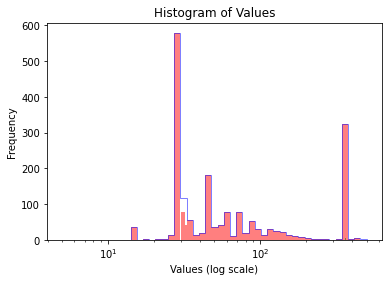

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data between 5 and 500
data = dt.Duration#np.random.uniform(low=5, high=500, size=10000)

# Create histogram with log scale on x-axis
bins = np.logspace(np.log10(5), np.log10(500), 50)
plt.hist(data, bins=bins, alpha=0.5, color='b', histtype='step')

# Highlight bins for values 30 and 360 with colored bars
bin_edges = np.concatenate((bins[:-1][bins[:-1] < 30], [30, 32], bins[:-1][bins[:-1] > 32]))
bin_values, _, _ = plt.hist(data, bins=bin_edges, alpha=0.5, color='r', align='mid', edgecolor='none')
plt.bar(31, bin_values[0], width=2, alpha=0.5, color='r', edgecolor='none')
plt.bar(362.5, bin_values[-1], width=5, alpha=0.5, color='g', edgecolor='none')

# Set x-axis label to log scale
plt.xscale('log')
plt.xlabel('Values (log scale)')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()
